<a href="https://colab.research.google.com/github/chihyu-tsai/CIS-519-HW0/blob/main/CIS_519_hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 4190/5190 Fall 2025 - Homework 0**

> **Important: Save a Copy Before Starting**  
> Please click *“Copy to Drive”* in the top menu bar or go to *File → Save a Copy in Drive*.  
> This notebook is the **master version** and cannot be edited directly. Work in your own copy to save changes.

---

> **Indentation Reminder**  
> Use **4 spaces per indentation level**, not 2, to follow Python’s style guide and avoid formatting issues.  
>  
> To change indentation spacing in Colab if needed:  
> 1. Go to *Tools* → *Settings* → *Editor*.  
> 2. Adjust *Indentation width* to 4 spaces.  
> 3. Save and restart the editor.

---

> **Execution Reminder**  
> Run the notebook cells **sequentially from top to bottom**  
> to ensure all packages are installed and variables are defined before use.  
> Running cells out of order may cause errors or missing packages.


## Setup Cell 1: Imports and Configuration

This cell imports essential libraries you will need for this assignment. It also disables Pandas' chained assignment warnings to reduce clutter in your output.

*Note:* Only import libraries when you need them to keep your notebook clean. Additional imports will be added as the assignment progresses.

In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd

# Suppress pandas chained assignment warnings for cleaner output
pd.options.mode.chained_assignment = None

## Setup Cell 2: Environment Detection

This cell installs the `dill` package (used to retrieve source code) and detects whether the notebook is running in Google Colab or the autograder environment.

- `NOTEBOOK` will be `True` if running in Colab and `False` in the autograder.
- This check helps your code run correctly depending on the environment.
- Do **not** modify this cell.

The cell will print an informational message indicating where the notebook is running.

In [ ]:
# For autograder only, do not modify this cell.
# Determines if code is running in Google Colab or autograder environment

!pip install dill
from dill.source import getsource

NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)

if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")

[INFO, OK] Google Colab.


## PennGrader Setup

First, you need to set up the PennGrader, an autograder that we will use throughout the semester. The PennGrader will automatically grade your answers and provide you with instant feedback. Unless otherwise specified, you may resubmit up to a reasonable number of attempts (e.g., 100 attempts per day).

**Only your best score will be recorded in our backend database.**

After completing each homework assignment, you must submit your iPython notebook to Gradescope before the homework deadline. Gradescope will then retrieve and display your scores from our backend database.

In [ ]:
%%capture
!pip3 install penngrader-client

In [ ]:
from penngrader.grader import *

### Autograder Setup

Please enter your **8-digit PennID** in the cell below:

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO IN OUR BACKEND.

STUDENT_ID = 22412986          # YOUR PENN-ID GOES HERE AS AN INTEGER

## Initialize the Autograder

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately receive a score.

**NOTE:** We store your submissions and check them against other students' submissions. So, not that you would, but please do **not** cheat.

In [ ]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting notebook-config.yaml


In [ ]:
grader = PennGrader('notebook-config.yaml', 'cis5190_f25_HW0', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 22412986

Make sure this correct or we will not be able to store your grade


## Intro to Python Libraries

In this assignment, we will become acquainted with several important data libraries commonly used in machine learning. The assumption is that you have already, if necessary, reviewed the basics of Python, such as in [this series](https://realpython.com/courses/python-turtle-beginners/).

## Imports

Let's import three data-related packages that we will use throughout this course: **numpy**, **pandas**, and **matplotlib**.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Numpy

`numpy` is the standard library used to work with arrays in Python. You can convert Python lists into numpy arrays or use them directly with many machine learning libraries, such as `sklearn`.


**Question 1a (5 points):** In this assignment, you will create a function that returns a numpy array using the method `np.array(xs)`, where `xs` is a list. The function should take a positive integer `n` and return the array $[e^0 = 1, e^1 = e, \ldots, e^n]$.


In [ ]:
def exps_up_to_n(n: int):
    """
    Generate a numpy array of exponentials from 0 to n.

    Parameters
    ----------
    n : int
        A non-negative integer representing the highest exponent.

    Returns
    -------
    np.array
        A one-dimensional numpy array `X` of length `n + 1`,
        where for each index `i` (0 <= i <= n), `X[i] = e^i` (the exponential of i).

    Notes
    -----
    Useful functions include `math.exp` for computing the exponential and `range` for iterations.
    """

    # STUDENT TODO START:
    res = []
    for i in range(n+1):
        res.append(math.exp(i))
    return np.array(res)

    # STUDENT TODO END

In [ ]:
exps_up_to_n(10)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03, 2.20264658e+04])

Included in every question is one or more test cases that can be used to check if your implementation is likely to satisfy the autograder.

In [ ]:
def test_eval_exps():
    """
    Local test case to verify the correctness of the exps_up_to_n function.
    Uses a fixed value for n (5) and checks if the output matches the expected list.
    Note: On Gradescope, hidden test values for n will be used during grading.
    """
    n = 5
    val = list(map(int, exps_up_to_n(n)))
    assert val == [1, 2, 7, 20, 54, 148]


# Run the local test case only when executing inside the notebook environment
if NOTEBOOK:
    test_eval_exps()

The autograder will grade your answer with different held-out test cases.

In [ ]:
# PennGrader Grading Cell
grader.grade('test_eval_exps', getsource(exps_up_to_n))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Question 1b (10 points):** This simple question is designed to help you become comfortable with looking up numpy functions, as well as with the autograder's "partial credit system." You will find the mean and standard deviation of a numpy array. Note that this can be done without numpy library functions, although it is much easier with such functions—either version will receive full points if correct. Partial credit will be awarded if either the mean or standard deviation is computed correctly, but the other is not.

In [ ]:
def mean_standard_dev_tuple_from_xs(xs: np.array):
    '''
    Calculate the mean and standard deviation of the input array.

    Parameters
    ----------
    xs : np.array
        A one-dimensional numpy array of numerical values representing the dataset.

    Returns
    -------
    tuple (float, float)
        A tuple `(mu, sigma)` where:
        - `mu` is the arithmetic mean (average) of the elements in `xs`.
        - `sigma` is the standard deviation of the elements in `xs`,
          measuring the amount of variation or dispersion from the mean.
    '''
    # STUDENT TODO START:
    return (np.mean(xs), np.std(xs))

    # STUDENT TODO END

In [ ]:
def test_mean_standard_dev_tuple_from_xs_1():
    """
    Local test to check the computed mean for a sample input array.
    Note: Gradescope will use different hidden test inputs for grading.
    """
    xs = [math.exp(i * 2.1) / 3 for i in range(10)]
    assert int(mean_standard_dev_tuple_from_xs(xs)[0]) == 6134451


def test_mean_standard_dev_tuple_from_xs_2():
    """
    Local test to check the computed standard deviation for a sample input array.
    Note: Gradescope will use different hidden test inputs for grading.
    """
    xs = [math.exp(i * 2.1) / 3 for i in range(10)]
    assert int(mean_standard_dev_tuple_from_xs(xs)[1]) == 16017926


# Run local tests only if executing inside the notebook environment
if NOTEBOOK:
    test_mean_standard_dev_tuple_from_xs_1()
    test_mean_standard_dev_tuple_from_xs_2()


In [ ]:
# PennGrader grading command
grader.grade('test_mean_variance_tuple_from_xs_1', getsource(mean_standard_dev_tuple_from_xs))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# PennGrader grading command
grader.grade('test_mean_variance_tuple_from_xs_2', getsource(mean_standard_dev_tuple_from_xs))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Pandas

Another common way to organize data is with the Pandas library. Pandas represents data using **DataFrames** and **Series**, where a Series is a one-dimensional labeled array and a DataFrame is a two-dimensional labeled collection of Series.

In this course, we'll use a DataFrame provided by the `seaborn` library for data visualization and analysis.


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This dataset is one of the most commonly used introductions to data science. It includes 4 features, all real numbers ranging from 0 up to some maximum value.

Later in the course, we will learn how to use these features to predict a label associated with each data point, such as the type of flower it represents.

For now, we will focus on learning how to filter the dataset to find all data points that share a specific label.

In [ ]:
iris.iloc[np.where(iris["species"] == "setosa")[0]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


**Question 2 (10 points):**  
Write a function that takes a flower class (one of `"setosa"`, `"versicolor"`, or `"virginica"`) and a number $n$ and returns the mean sepal length of the top $n$ flowers of that class, sorted by sepal width. In other words, compute the mean sepal length of the $n$ flowers with the highest sepal width within the specified class.


In [ ]:
def get_mean_sepal_length_from_class_top_n_width(iris, flower_class: str, n: int):
    """
    Compute the mean sepal length of the top n flowers by sepal width for a given flower class.

    Parameters
    ----------
    iris : pandas.DataFrame
        The iris dataset as a pandas DataFrame, which includes columns 'species', 'sepal_width', and 'sepal_length'.
    flower_class : str
        The target flower class (e.g., "setosa", "versicolor", or "virginica").
    n : int
        The number of top flowers to consider, based on sepal width.

    Returns
    -------
    float
        The mean sepal length of the top n flowers of the specified class, sorted by sepal width in descending order.

    Notes
    -----
    This function filters the dataset to include only the specified flower class, selects the top n rows with the largest sepal width, and computes the mean sepal length of this subset.
    """

    # STUDENT TODO START:
    df = iris.iloc[np.where(iris['species'] == flower_class)[0]]
    df = df.sort_values(by= 'sepal_width', ascending = False).iloc[:n]
    return np.mean(df['sepal_length'])

    # STUDENT TODO END

In [ ]:
get_mean_sepal_length_from_class_top_n_width(iris, 'setosa', 8)

np.float64(5.475)

In [ ]:
def test_get_mean():
    """
    Local test to verify that the function correctly computes the mean sepal length
    for the top n flowers of a given species.

    Note: Gradescope uses hidden values for 'species' and 'n' during official grading.
    """
    n = 5
    species = "setosa"
    expected_values = [5.7, 5.5, 5.2, 5.8, 5.4]
    species_mean = round(get_mean_sepal_length_from_class_top_n_width(iris, species, n), 2)
    assert species_mean == 5.52, f"Expected mean 5.52, but got {species_mean}"


# Run local test only if inside the notebook environment
if NOTEBOOK:
    test_get_mean()

In [ ]:
# PennGrader grading command
grader.grade('test_get_mean', getsource(get_mean_sepal_length_from_class_top_n_width))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Question 3 (10 points):**  
Your next task is to take a subset of the iris dataset that includes only the first $n$ examples of each species. Then return a copy of this modified subset where the "species" column contains integer values instead of string labels:  
- 0 corresponds to "setosa"  
- 1 corresponds to "versicolor"  
- 2 corresponds to "virginica"  

As you will learn, using integer-based categorical representations is particularly useful in many classification and other machine learning tasks involving categorical variables.


In [ ]:
def string_to_categorical_int(iris, n: int):
    """
    Convert the first n examples of each species in the iris dataset from string labels
    to integer categorical labels.

    Parameters
    ----------
    iris : pandas.DataFrame
        The iris dataset containing a 'species' column with string labels.
    n : int
        The number of examples to retain for each species.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame containing only the first n examples of each species,
        where the 'species' column is converted from strings to integers:
        - 0 for "setosa"
        - 1 for "versicolor"
        - 2 for "virginica"

    Notes
    -----
    The function groups the data by species and selects the first n rows of each group,
    then maps the species labels to integers according to the defined scheme.
    """
    # STUDENT TODO START:
    setosa = iris.iloc[np.where(iris["species"] == "setosa")[0]].iloc[:n]
    versicolor = iris.iloc[np.where(iris["species"] == "versicolor")[0]].iloc[:n]
    virginica = iris.iloc[np.where(iris["species"] == "virginica")[0]].iloc[:n]
    new_frame = pd.concat([setosa, versicolor, virginica], ignore_index = True)
    new_frame ['species'] = new_frame ['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
    })
    print(new_frame)
    return new_frame


    # STUDENT TODO END

In [ ]:
def test_string_to_cat1():
    """
    Test that the 'species' column is correctly converted to integers
    for the first n examples of each species in the iris dataset.

    Note: Gradescope uses hidden values for species, n, and column during grading.
    """
    n = 5
    df2 = string_to_categorical_int(iris, n)
    expected_species = [0]*5 + [1]*5 + [2]*5
    assert df2["species"].tolist() == expected_species, "Species column values do not match expected integer encoding."


def test_string_to_cat2():
    """
    Test that the 'sepal_length' column values remain unchanged
    after transformation for the first n examples of each species.

    Note: Gradescope uses hidden values for species, n, and column during grading.
    """
    n = 5
    df2 = string_to_categorical_int(iris, n)
    expected_sepal_length = [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 6.3, 5.8, 7.1, 6.3, 6.5]
    assert df2["sepal_length"].tolist() == expected_sepal_length, "Sepal length values do not match expected."


def test_string_to_cat3():
    """
    Test that the transformed DataFrame has the same columns as the original iris dataset.

    Note: Gradescope uses hidden value for n during grading.
    """
    n = 5
    df2 = string_to_categorical_int(iris, n)
    assert list(df2.columns) == list(iris.columns), "Column names do not match the original DataFrame."


# Run local tests only if inside the notebook environment
if NOTEBOOK:
    test_string_to_cat1()
    test_string_to_cat2()
    test_string_to_cat3()


    sepal_length  sepal_width  petal_length  petal_width  species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
5            7.0          3.2           4.7          1.4        1
6            6.4          3.2           4.5          1.5        1
7            6.9          3.1           4.9          1.5        1
8            5.5          2.3           4.0          1.3        1
9            6.5          2.8           4.6          1.5        1
10           6.3          3.3           6.0          2.5        2
11           5.8          2.7           5.1          1.9        2
12           7.1          3.0           5.9          2.1        2
13           6.3          2.9           5.6          1.8        2
14        

In [ ]:
# PennGrader grading command
grader.grade('test_string_to_cat1', getsource(string_to_categorical_int))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# PennGrader grading command
grader.grade('test_string_to_cat2', getsource(string_to_categorical_int))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# PennGrader grading command
grader.grade('test_string_to_cat3', getsource(string_to_categorical_int))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Matplotlib

**Question 4 (15 points):**  
This exercise is designed to familiarize you with plotting data in [matplotlib](https://matplotlib.org/), a widely used Python graphing library that is pre-installed on Google Colab. You will generate a scatter plot of Mars' Declination vs. Time using Tycho Brahe's observational data recorded from 1582 to 1600. An example of the plot is shown below. Starter code is provided to download the data and process it into a Pandas DataFrame.

Your scatter plot should follow these requirements:

- Plot the angle of declination on the Y-axis and days since the initial observation on the X-axis.
- Use a `+` shaped marker (`marker='+'`).
- Set the transparency (`alpha`) of each data point to 0.25.
- Plot data points from each Volume of Tycho Brahe's notes in a different color.
- Properly label each Volume in the legend placed in the lower right corner.
- Title the graph and label each axis as shown in the example.
- Add grid lines with transparency (`alpha`) set to 0.25.
- Set the figure size to 12 inches wide by 5 inches tall using `set_size_inches`.

Embed a picture of your figure (a `.png` file, downloadable from Colab) at the end of your written problem set. It should visually match the example figure, excluding the "Homework Example" watermark.



---

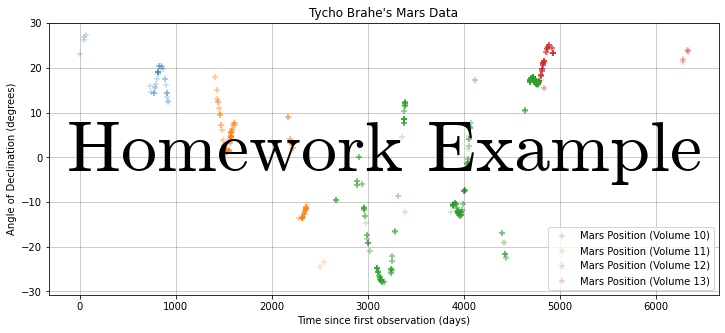


In [ ]:
# Setup Cell: Visualization Libraries

import matplotlib.pyplot as plt

In [ ]:
# Load data
!wget http://www.pafko.com/tycho/mars.xls
df = pd.read_excel("mars.xls", usecols="F,O,U", skiprows=5)
df['Time Deltas'] = df['Days since 1 AD'] - df['Days since 1 AD'].min()
df.head()

--2025-09-03 13:40:28--  http://www.pafko.com/tycho/mars.xls
Resolving www.pafko.com (www.pafko.com)... 192.34.55.89
Connecting to www.pafko.com (www.pafko.com)|192.34.55.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365056 (356K) [application/vnd.ms-excel]
Saving to: ‘mars.xls’

mars.xls            100%[===================>] 356.50K  2.04MB/s    in 0.2s    

2025-09-03 13:40:28 (2.04 MB/s) - ‘mars.xls’ saved [365056/365056]



,Volume,Days since 1 AD,Declination,Time Deltas
0,10,578150.500000,23.116667,0.000000
1,10,578198.500000,26.933333,48.000000
2,10,578195.500000,26.372222,45.000000
3,10,578217.500000,27.300000,67.000000
4,10,578883.059722,15.900000,732.559722


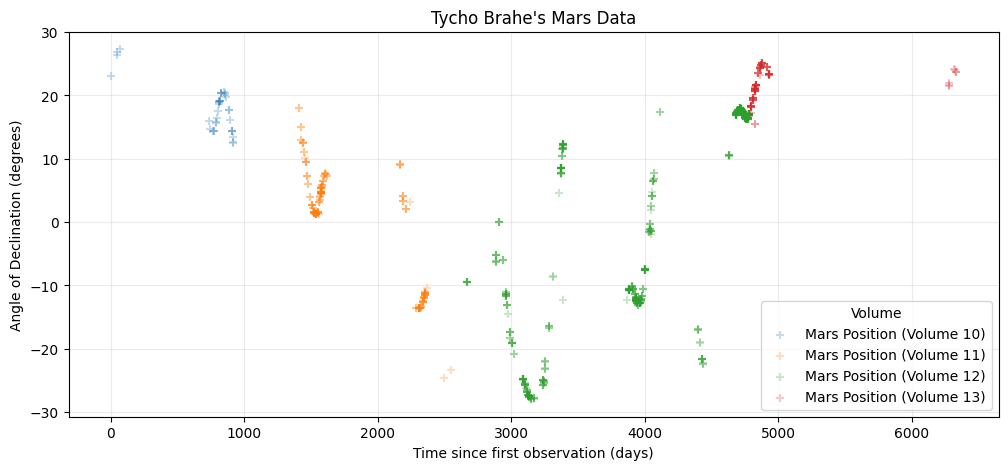

In [ ]:
# STUDENT TODO START:
graph = plt.figure()
graph.set_size_inches(12, 5)

for key, small in df.groupby('Volume'):
    plt.scatter(small['Time Deltas'], small['Declination'],
         marker='+',
         alpha = 0.25,
         label=f"Mars Position (Volume {key})"
         )
plt.xlabel('Time since first observation (days)')
plt.ylabel('Angle of Declination (degrees)')
plt.title("Tycho Brahe's Mars Data")
plt.grid(alpha = 0.25)
plt.legend(loc='lower right', title='Volume')

# STUDENT TODO END

## Submit to Gradescope

Congratulations on completing the HW0 coding assignment!  

The final step is to download this iPython notebook and submit it to [Gradescope](https://www.gradescope.com).  

*Note:* Gradescope will automatically re-run your submitted notebook.

*To download the notebook from Google Colab, click*  
`File` → `Download` → `Download .ipynb`
